In [59]:
#import lib

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [60]:
#read csv

df = pd.read_csv('Salary_Data (1).csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [61]:
df.shape

(30, 2)

In [62]:
#info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [63]:
#describe data

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


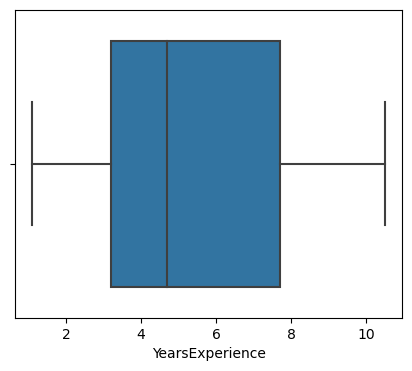

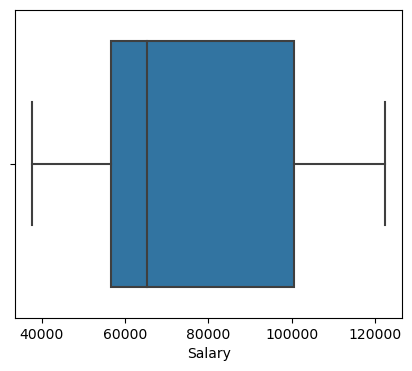

In [64]:
plt.figure(figsize = (5,4))
plt.tight_layout()
sns.boxplot(df.YearsExperience)
plt.show()

plt.figure(figsize=(5,4))
plt.tight_layout()
sns.boxplot(df.Salary)
plt.show()

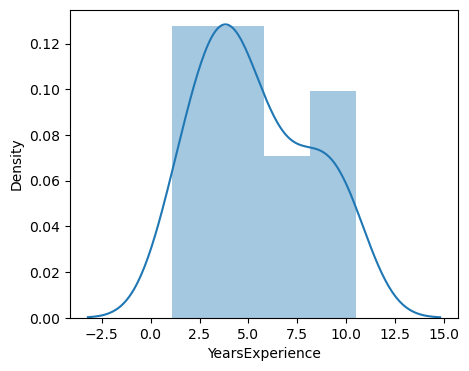

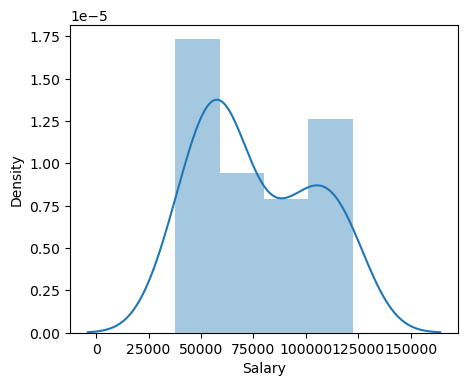

In [65]:
plt.figure(figsize=(5,4))
plt.tight_layout()
sns.distplot(df.YearsExperience)
plt.show()

plt.figure(figsize=(5,4))
plt.tight_layout()
sns.distplot(df.Salary)
plt.show()

<AxesSubplot:>

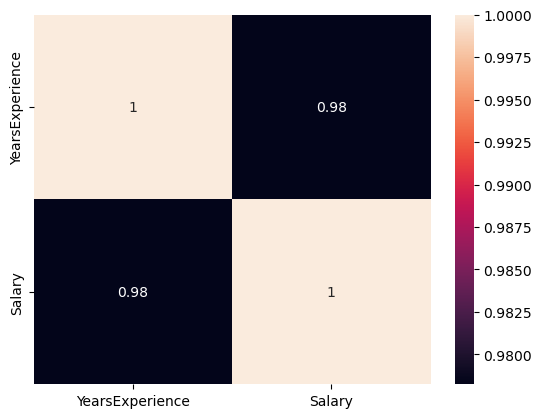

In [66]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

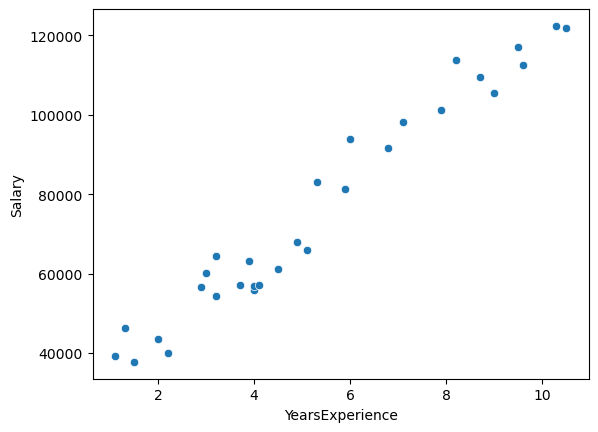

In [67]:
sns.scatterplot(x = df['YearsExperience'], y =df['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

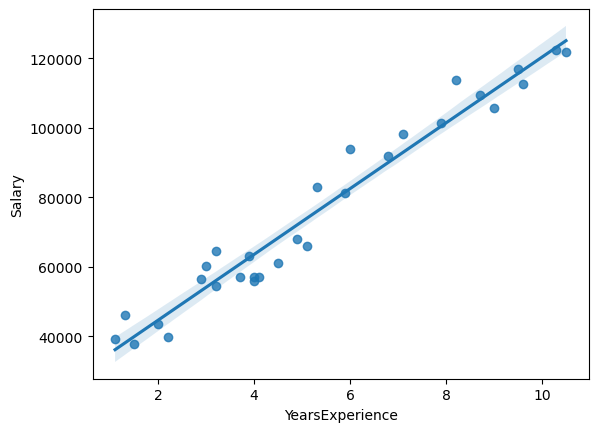

In [68]:
sns.regplot(x = df['YearsExperience'], y = df['Salary'])

In [69]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [70]:
model = smf.ols('Salary ~ YearsExperience',data = df).fit()

In [71]:
model

In [72]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [73]:
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [74]:
predicted_salary = model.predict(df.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual': df.Salary, 'Salary_predicted': predicted_salary})
pred_df

,Salary_Actual,Salary_predicted
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


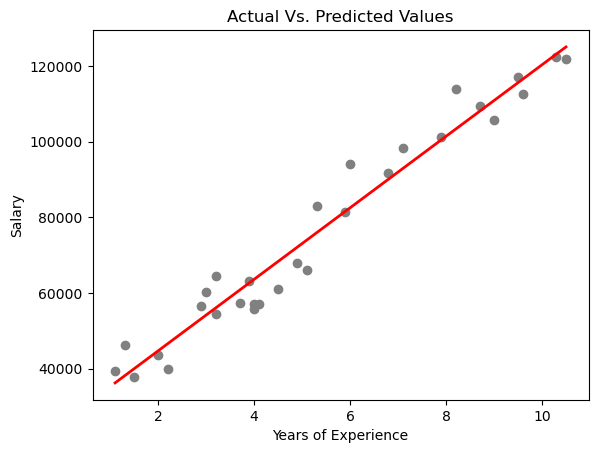

In [75]:
plt.scatter(df.YearsExperience, df.Salary, color='gray')
plt.plot(df.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        19:26:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
df1 = pd.DataFrame.copy(df)
df1['log_YearsExperience'] = np.log(df1.YearsExperience)
df1.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [80]:
log_model = smf.ols('Salary ~ log_YearsExperience' , data = df1).fit()

In [84]:
model

In [83]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64